# Natural Language Processing - Introduction

In [1]:
from nltk import corpus, FreqDist, bigrams
from functools import reduce
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Project Gutenberg in NLTK

In [2]:
corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
moby_raw = corpus.gutenberg.raw('melville-moby_dick.txt')
moby_words = corpus.gutenberg.words('melville-moby_dick.txt')
moby_sents = corpus.gutenberg.sents('melville-moby_dick.txt')
moby_raw[2000:3000]

"olely valuable or entertaining, as\r\naffording a glancing bird's eye view of what has been promiscuously\r\nsaid, thought, fancied, and sung of Leviathan, by many nations and\r\ngenerations, including our own.\r\n\r\nSo fare thee well, poor devil of a Sub-Sub, whose commentator I am.\r\nThou belongest to that hopeless, sallow tribe which no wine of this\r\nworld will ever warm; and for whom even Pale Sherry would be too\r\nrosy-strong; but with whom one sometimes loves to sit, and feel\r\npoor-devilish, too; and grow convivial upon tears; and say to them\r\nbluntly, with full eyes and empty glasses, and in not altogether\r\nunpleasant sadness--Give it up, Sub-Subs!  For by how much the more\r\npains ye take to please the world, by so much the more shall ye for\r\never go thankless!  Would that I could clear out Hampton Court and\r\nthe Tuileries for ye!  But gulp down your tears and hie aloft to the\r\nroyal-mast with your hearts; for your friends who have gone before\r\nare clearing

## How many tokens has the book?

In [5]:
moby_len = len(moby_words)
moby_len

260819

* Definition: **Token**
> A sequence of characters that is treated as a single group.

* How should the following sentance be tokenized?
```
"My oncle lives in New York."
```
```
['My', 'oncle', 'lives', 'in', 'New', 'York', '.']
```
or
```
['My', 'oncle', 'lives', 'in', 'New York', '.']
```

## How big is the vocabulary of the book?

In [6]:
moby_vocabulary = len(set(moby_words))
moby_vocabulary

19317

## What is its lexical diversity?

In [7]:
moby_len / moby_vocabulary

13.502044830977896

### What about the other books?

In [10]:
def lexical_diversity(tokens):
    return len(tokens) / len(set(tokens))

lex_rank = dict((id, lexical_diversity(corpus.gutenberg.words(id)))
                for id in corpus.gutenberg.fileids())

sorted(lex_rank.items(), key=itemgetter(1), reverse=True)

[('bible-kjv.txt', 73.40068269300603),
 ('austen-emma.txt', 24.63538599411087),
 ('edgeworth-parents.txt', 21.960075054727405),
 ('austen-sense.txt', 20.719449729255086),
 ('austen-persuasion.txt', 16.00962165688193),
 ('melville-moby_dick.txt', 13.502044830977896),
 ('bryant-stories.txt', 12.57081447963801),
 ('carroll-alice.txt', 11.309681697612731),
 ('chesterton-ball.txt', 10.841175813121717),
 ('whitman-leaves.txt', 10.809058552585665),
 ('burgess-busterbrown.txt', 10.75),
 ('chesterton-brown.txt', 10.37028557657549),
 ('chesterton-thursday.txt', 10.167915381225209),
 ('milton-paradise.txt', 9.00613896381732),
 ('shakespeare-caesar.txt', 7.256460674157303),
 ('shakespeare-hamlet.txt', 6.858821369561227),
 ('shakespeare-macbeth.txt', 5.760517799352751),
 ('blake-poems.txt', 4.59010989010989)]

## Zipf's distribution

In [9]:
token_freq = FreqDist(moby_words)
sorted_token_freq = sorted(token_freq.items(), key=itemgetter(1), reverse=True)
sorted_token_freq[200:230]

[('once', 144),
 ('sir', 143),
 ('air', 141),
 ('line', 141),
 ('!--', 141),
 ('Now', 139),
 ('crew', 139),
 ('whole', 136),
 ('Sperm', 135),
 ('half', 135),
 ('fish', 133),
 ('against', 132),
 ('God', 132),
 ('things', 132),
 ('came', 130),
 ('thee', 129),
 ('each', 127),
 ('feet', 125),
 ('small', 125),
 ('mast', 124),
 ('hands', 123),
 ('tell', 122),
 ('full', 121),
 ('till', 121),
 ('As', 120),
 ('let', 120),
 ('Oh', 119),
 ('something', 119),
 ('take', 118),
 ('both', 118)]

### Token frequency

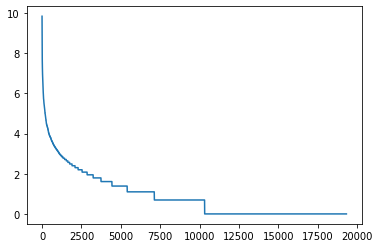

In [11]:
token_log_freq = pd.Series(map(lambda tpl: np.log(tpl[1]), sorted_token_freq))
sns.lineplot(data=token_log_freq)

### Frequency of token frequency

In [12]:
ranks = token_freq.values()
rank_freq = FreqDist(ranks)
sorted_rank_freq = sorted(rank_freq.items(), key=itemgetter(1), reverse=True)
sorted_rank_freq[:20]

[(1, 9002),
 (2, 3193),
 (3, 1721),
 (4, 968),
 (5, 695),
 (6, 497),
 (7, 384),
 (8, 318),
 (9, 253),
 (10, 196),
 (11, 190),
 (12, 152),
 (13, 112),
 (15, 107),
 (14, 100),
 (16, 98),
 (17, 71),
 (18, 69),
 (19, 58),
 (20, 50)]

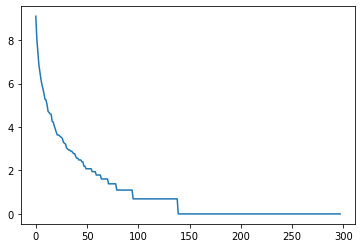

In [13]:
rank_log_freq = pd.Series(map(lambda tpl: np.log(tpl[1]), sorted_rank_freq))
sns.lineplot(data=rank_log_freq)

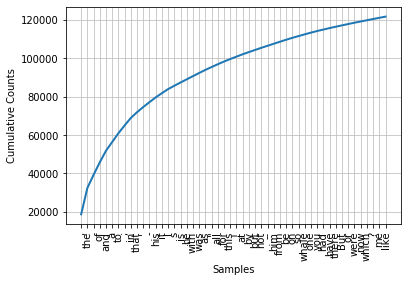

In [14]:
token_freq.plot(50, cumulative=True)

### How many unique tokens are there?

In [43]:
print("Total number of tokens: {num}".format(num=len(moby_words)))
print("Total number of unique tokens: {num}".format(num=len(token_freq.hapaxes())))

Total number of tokens: 260819
Total number of unique tokens: 9002


More than half of the words are just the same 50 words and the other half are entirely unique.

Neither frequent nor infrequent words help.

### Let's try long tokens!

In [20]:
long_tokens = [t for t in set(moby_words) if len(t) > 10]
print("Number of long tokens: {}".format(len(long_tokens)))
long_tokens[:20]

Number of long tokens: 1912


['irresponsible',
 'distinctions',
 'administering',
 'soliloquized',
 'essentially',
 'Swackhammer',
 'unanswerable',
 'catastrophe',
 'deepeningly',
 'furthermore',
 'bespattering',
 'pronouncing',
 'entrenchments',
 'unparticipated',
 'freebooting',
 'expostulations',
 'interrupted',
 'marlinspikes',
 'antiquities',
 'reprehensible']

### Even more fine grained
Long and frequend tokens

In [27]:
long_freq_token = [t for t in set(moby_words) if len(t) > 7 and token_freq[t] > 7]
print("Number of long frequent tokens: {num}".format(num=len(long_freq_token)))
long_freq_token[:20]

Number of long frequent tokens: 555


['uncommon',
 'magnitude',
 'perilous',
 'commander',
 'accounts',
 'revealed',
 'particulars',
 'bowsprit',
 'commotion',
 'harpooned',
 'sweeping',
 'temporarily',
 'profound',
 'greatest',
 'glittering',
 'significant',
 'involuntarily',
 'vitality',
 'hopeless',
 'tormented']

## How to incorporate Context?

* Definition: **ngram**

> A sequence of n consecutive tokens is colled a ngram.

If n=2 they are called bigrams, if n=3 they are called trigrams, ...

Example: 'My oncle lives in New York.'
* Tokens: ['My', 'oncle', 'lives', 'in', 'New York', '.']
* bigrams: [('My', 'oncle'), ('oncle', 'lives'), ('lives', 'in'), ('in', 'New York'), ('New York', '.')]

In [41]:
sent = ['My', 'oncle', 'lives', 'in', 'New York', '.']

def naive_bigrams(lst, token):
    if not lst:
        lst.append(token)
    elif token != '.':
        last_token = lst.pop()
        lst.append((last_token, token))
        lst.append(token)
    else:
        last_token = lst.pop()
        lst.append((last_token, token))
    return lst

reduce(naive_bigrams, sent, [])

[('My', 'oncle'),
 ('oncle', 'lives'),
 ('lives', 'in'),
 ('in', 'New York'),
 ('New York', '.')]

In [42]:
list(bigrams(sent))

[('My', 'oncle'),
 ('oncle', 'lives'),
 ('lives', 'in'),
 ('in', 'New York'),
 ('New York', '.')]

## Predict the next word

\begin{equation*}
P(\text{My}, \text{oncle}, \text{lives}, \text{in}, \text{New_York}) = P(\text{My} | \text{<s>}) \cdot P(\text{oncle} | \text{My}) \cdot P(\text{lives} | \text{My oncle}) \cdot P(\text{in} | \text{My oncle lives}) \cdot P(\text{New_York}| \text{My oncle lives in}) \cdot P(\text{</s>}|\text{My oncle lives in New_York})
\end{equation*}

* This can be hard to calculate, but we can create a reasonable approximation with bigrams.

\begin{equation*}
P(\text{My}, \text{oncle}, \text{lives}, \text{in}, \text{New_York}) = P(\text{My} | \text{<s>}) \cdot P(\text{oncle} | \text{My}) \cdot P(\text{lives} | \text{oncle}) \cdot P(\text{in} | \text{lives}) \cdot P(\text{New_York}| \text{in}) \cdot P(\text{</s>}|\text{New_York})
\end{equation*}

* To get the probability of a word:
\begin{equation*}
P(t_n|t_{n-1}) = \frac{P(t_n,t_{n-1})}{P( t_{n-1})}
\end{equation*}